# Importing the libraries


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Data Collection & Analysis

In [2]:
# loading the data from csv file to a pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

About Dataset Columns:

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance (target variable)


In [3]:
# show first 5 row of the DataFrame
insurance_dataset.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# get some information about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
- Sex
- Smoker
- Region

In [6]:
# checking for  missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [7]:
# statistical measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-411701ac91db>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


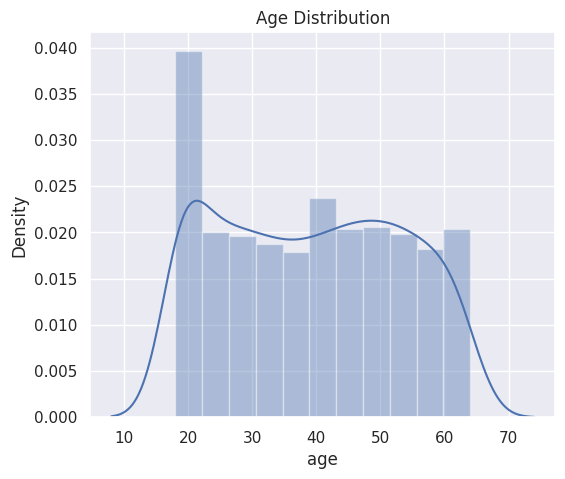

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,5))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

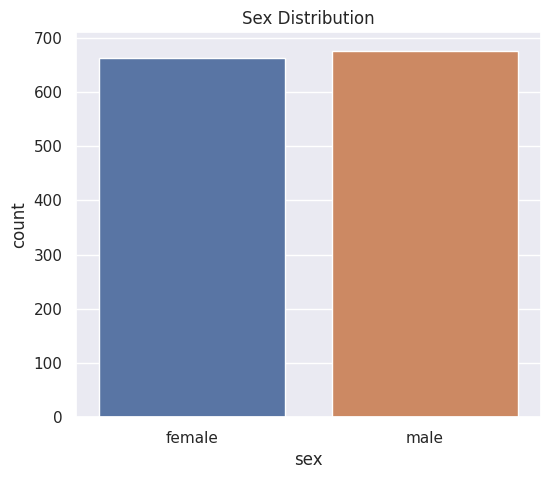

In [9]:
# Gender column
plt.figure(figsize=(6,5))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [10]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<ipython-input-11-0dae04162498>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


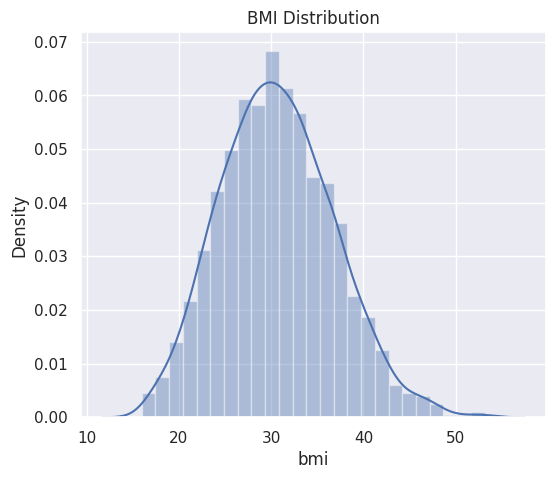

In [11]:
# bmi distribution
plt.figure(figsize=(6,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

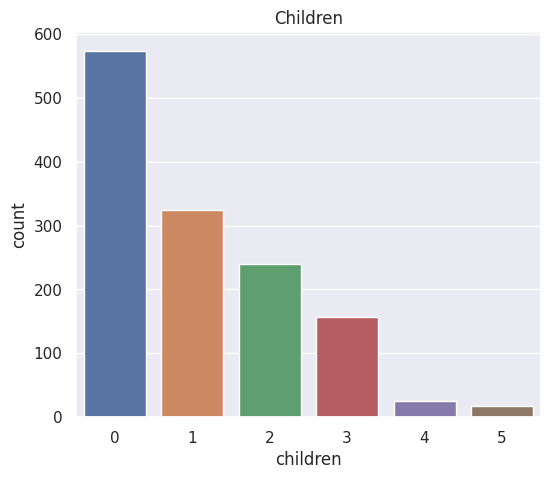

In [12]:
# children column
plt.figure(figsize=(6,5))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [13]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

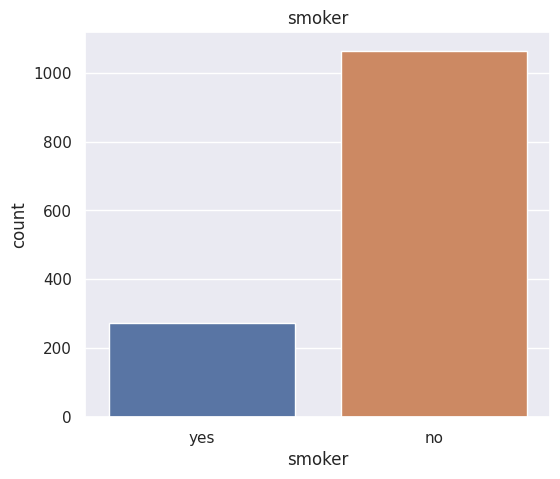

In [14]:
# smoker column
plt.figure(figsize=(6,5))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [15]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

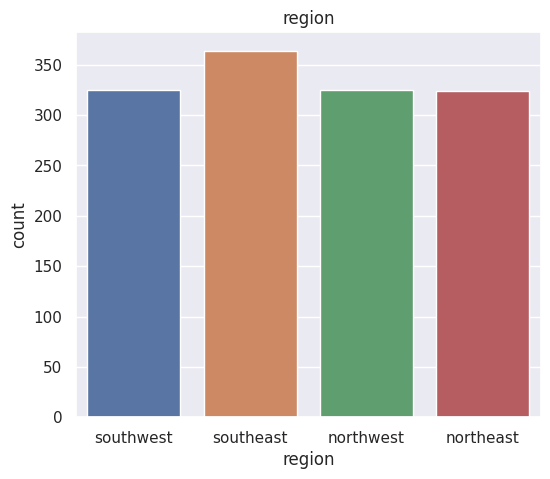

In [16]:
# region column
plt.figure(figsize=(6,5))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [17]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<ipython-input-18-40fa80380b1f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


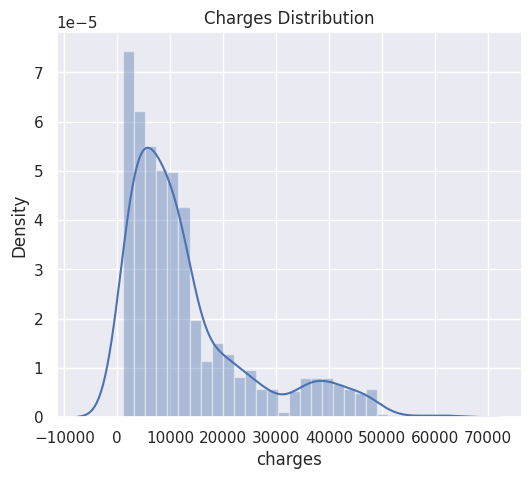

In [18]:
# distribution of charges value
plt.figure(figsize=(6,5))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()

# Data Pre-Processing

Engoding the categorical features

In [19]:
from ast import In
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# Encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# Encoding 'region' column (One-Hot Encoding)
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc_data = pd.DataFrame(enc.fit_transform(insurance_dataset[['region']]).toarray().astype(int), 
                        columns=["region_"+str(int(i)) for i in range(4)])

# Deal With Dummy Variable Trap
enc_data.drop(['region_3'], axis=1, inplace=True)

# To add this back into the original dataframe 
insurance_dataset = pd.concat([insurance_dataset, enc_data], axis=1)
# Droping the region column 
insurance_dataset.drop(['region'], axis=1, inplace=True)

In [20]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,charges,region_0,region_1,region_2
0,19,1,27.900,0,0,16884.92400,0,0,0
1,18,0,33.770,1,1,1725.55230,0,0,1
2,28,0,33.000,3,1,4449.46200,0,0,1
3,33,0,22.705,0,1,21984.47061,0,1,0
4,32,0,28.880,0,1,3866.85520,0,1,0


Get Features(X) and Target(y)

In [21]:
X = insurance_dataset.drop(['charges'], axis=1)
y = insurance_dataset['charges']

In [22]:
X

,age,sex,bmi,children,smoker,region_0,region_1,region_2
0,19,1,27.900,0,0,0,0,0
1,18,0,33.770,1,1,0,0,1
2,28,0,33.000,3,1,0,0,1
3,33,0,22.705,0,1,0,1,0
4,32,0,28.880,0,1,0,1,0
...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,0,1,0
1334,18,1,31.920,0,1,1,0,0
1335,18,1,36.850,0,1,0,0,1
1336,21,1,25.800,0,1,0,0,0


In [23]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Splitting The Data Into Training & Testing Data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
print('Training Data Size =', X_train.shape, 'and Testing Data Size =', X_test.shape)

Training Data Size = (1070, 8) and Testing Data Size = (268, 8)


# Training The Multiple Linear Regression model on the Training set

In [26]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Model Evaluation: Predicting the Test set results

In [27]:
y_pred_test = regressor.predict(X_test)

In [28]:
# R squared value
from sklearn import metrics
r2_test = metrics.r2_score(y_test, y_pred_test)
print('R squared value :', r2_test)

R squared value : 0.7449415564623685


In [29]:
y_pred_train = regressor.predict(X_train)

In [30]:
# R squared value
from sklearn import metrics
r2_train = metrics.r2_score(y_train, y_pred_train)
print('R squared value :', r2_train)

R squared value : 0.7520187377309014


# Training The Random Forest Regression model on the Training set

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor2 = RandomForestRegressor(max_depth=3, 
                                   n_estimators = 30,
                                   random_state = 0)
regressor2.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=30, random_state=0)

Model Evaluation: Predicting the Test set results

In [32]:
y_pred_test = regressor2.predict(X_test)

In [33]:
# R squared value
from sklearn import metrics
r2_test = metrics.r2_score(y_test, y_pred_test)
print('R squared value :', r2_test)

R squared value : 0.8589687584760421


In [34]:
y_pred_train = regressor2.predict(X_train)

In [35]:
# R squared value
from sklearn import metrics
r2_train = metrics.r2_score(y_train, y_pred_train)
print('R squared value :', r2_train)

R squared value : 0.8626615443498303
